In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression # The Machine Learnig Algorithms
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # This can be used to scale your data
import matplotlib.pyplot as plt
import seaborn as sb

## Data Exploration and Cleaning

- Explore the different columns in the data
- Check for missing values and use appropriate techniques to fill/remove the missing values

In [6]:
df = pd.read_csv("./train.csv")

In [7]:
df.shape

(700, 2)

In [8]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [11]:
df.isnull().sum()# Checking for missing values

x    0
y    0
dtype: int64

In [10]:
#Fill in the missing values
# df.fillna(method='backfill',inplace=True)
#Remove the missing values
df.dropna(inplace=True)

## Visualize your data by plotting
- In this case we just have 1 independent variable 'x' and 1 dependent variable 'y'

In [12]:
x_train = np.array(df['x'])#The independet variable/feature
y_train = np.array(df['y'])#The dependent variable/output

Text(0, 0.5, 'Y Values - Dependent Variable')

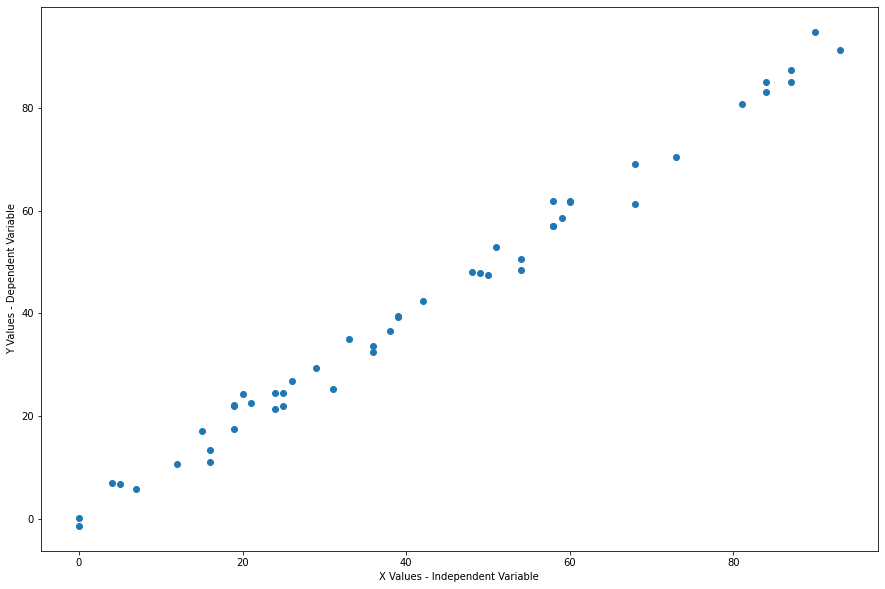

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(x_train[:50],y_train[:50])
plt.xlabel("X Values - Independent Variable")
plt.ylabel("Y Values - Dependent Variable")

## Building a Simple Linear Regression Model
- We will use the scikit-learn package to implement the Linear Regression Model
- This model is used to get the best-fit line to the above plot

In [14]:
reg = LinearRegression()# Define the model's object
reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))#Call the object's function to fit/train the model
# train on training data

LinearRegression()

- Now let us look at our predictions best-fit line versus the actual values on the ****Test dataset****

In [15]:
df_test = pd.read_csv("./test.csv")#Reading the test dataset
x_test = np.array(df_test['x'])#Store the x-test values
y_test = np.array(df_test['y'])#Store the y-test values

- Calling your trained Machine Learning Model to make predictions on unknown data points

In [20]:
# predict values of the testing data using the model trained from training data
model_predictions  =reg.predict(x_test.reshape(-1,1))

Text(0, 0.5, 'Y Test Values - Dependent Variable')

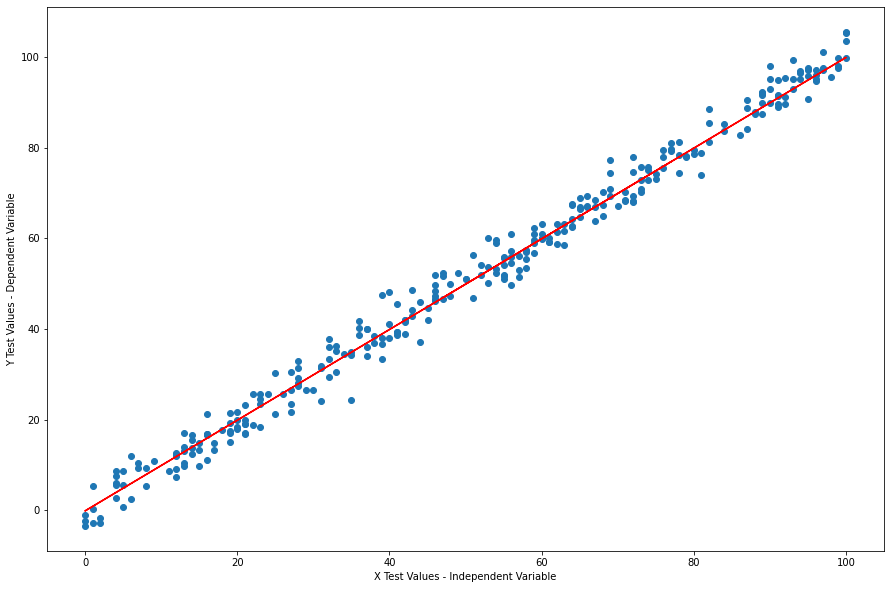

In [25]:
plt.figure(figsize=(15,10))

# scatter: plots all the points
# plot: draws a line connecting the points? 
plt.scatter(x_test,y_test)
plt.plot(x_test,model_predictions,color='r')
plt.xlabel("X Test Values - Independent Variable")
plt.ylabel("Y Test Values - Dependent Variable")

## Evaluating our model quantitatively
- Since this is a Regression task, we cannot rely on accuracy
- Metrics such as R2 score, mean squared error, mean absolute error etc. are used to evaluate such tasks

In [26]:
mean_squared_error(y_test,model_predictions) # There is a lot of room for improvement

9.432922192039317

## Building the Logistic Regression Model

In [27]:
df_social = pd.read_csv("./Social_Network_Ads.csv")# Reading the new dataset

In [28]:
df_social.shape

(400, 5)

In [31]:
df_social.sample(10)# A glimpse into the data

,User ID,Gender,Age,EstimatedSalary,Purchased
215,15779529,Female,60,108000,1
38,15671766,Female,26,72000,0
311,15622585,Male,39,96000,1
193,15662901,Male,19,70000,0
370,15611430,Female,60,46000,1
151,15576219,Male,41,45000,0
24,15705113,Male,46,23000,1
26,15792818,Male,49,28000,1
149,15767871,Male,20,74000,0
58,15642885,Male,22,18000,0


In [86]:
df_social["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [87]:
#Checking for missing values
df_social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Training the Logistic Regression Model
- In this case since we have only one dataset, we need to split it into trainig 
and testing datasets
- We will be using scikit-learn to do the splitting 

In [80]:
# specify the columns to use for the model to consider (in this case, we're trying to use age and estimated salary to predict whether or not they purchased the product)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_social[['Age','EstimatedSalary']],df_social[['Purchased']],\
                                                          test_size=0.1) # Splitting the data into train and test

In [81]:
log_reg = LogisticRegression(class_weight={1:0.6, 0: 0.5})# Initializing the model
log_reg.fit(x_train_2,y_train_2)#Training the model

C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(class_weight={0: 0.5, 1: 0.6})

## Evaluate your models using some metrics
- Accuracy, recall and precision are the most common metrics used to evaluate models for classification problems

In [82]:
social_predictions = log_reg.predict(x_test_2)

In [83]:
print(classification_report(y_test_2,social_predictions))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        27
           1       0.00      0.00      0.00        13

    accuracy                           0.68        40
   macro avg       0.34      0.50      0.40        40
weighted avg       0.46      0.68      0.54        40

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248

## Visualize the Ground-Truth values Vs predictions

- We will first look at the ground-truth testing dataset values
- Next we will look at how our model is making the predictions

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

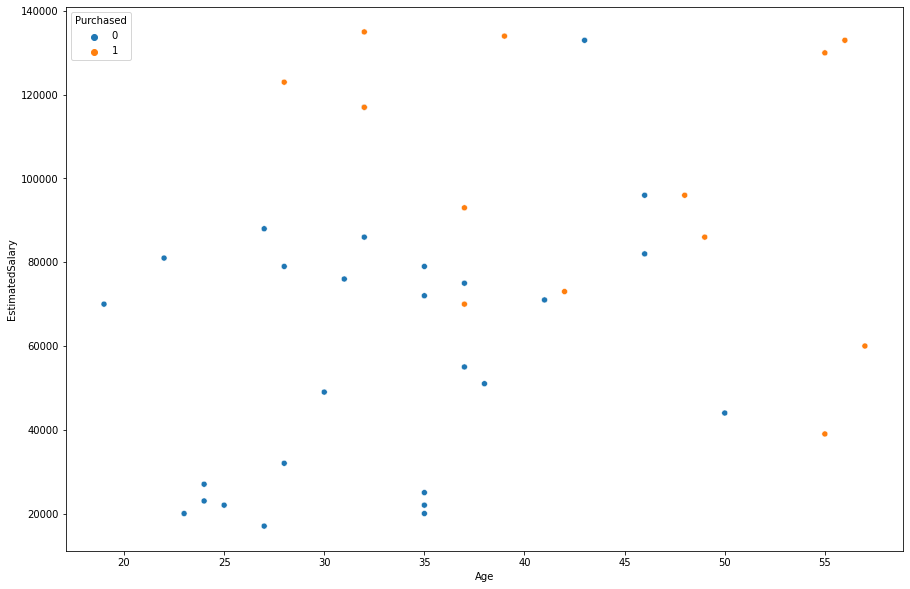

In [84]:
# ground truth
plt.figure(figsize=(15,10))

sb.scatterplot(data = x_test_2, x = 'Age',y = 'EstimatedSalary',hue=y_test_2['Purchased'])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

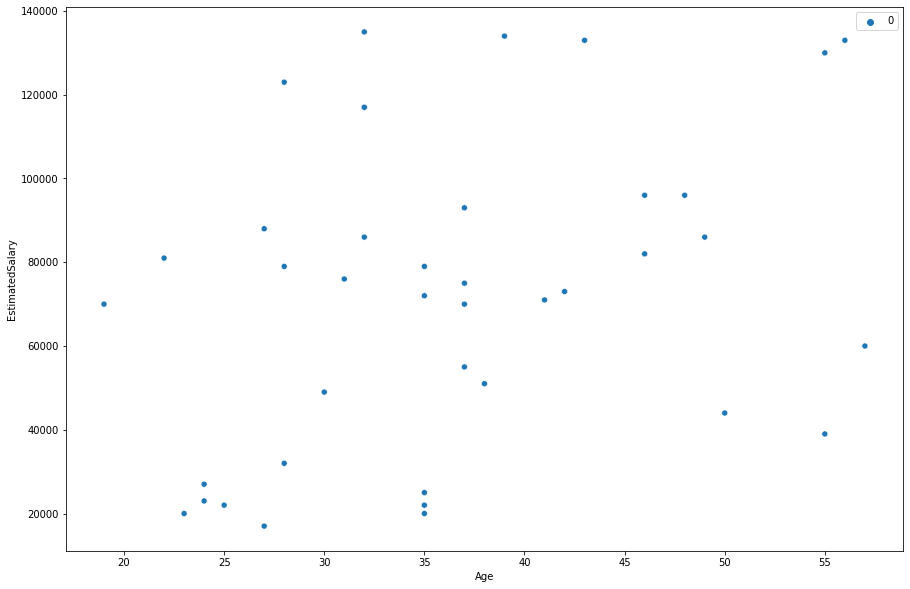

In [85]:
# predictions
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test_2, x = 'Age',y = 'EstimatedSalary',hue=social_predictions)